##  Train and Test Split - Irisdataset

#### 1. Split the datasets into two pieces: a training set and a testing set
#### 2. Train the model in training set
#### 3. Test the model in testing set

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
x.shape
y.shape

(150,)

In [10]:
#split x and y in training and testing set.
#fromsklearn.cross_validation import train_test_split :: deprecated
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [11]:
#print the shape of new x objects
print(x_train.shape)
print(x_test.shape)

(90, 4)
(60, 4)


In [12]:
#print the shape of new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [13]:
#2. Train the model in training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#3. Make prediction on the testing set
y_prediction= logreg.predict(x_test)

y_prediction


array([1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2])

In [17]:
# compare actual response values(y_test) with predicted response values y_pred)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_prediction))

0.9


#### for KNN classifier when k = 5

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(prediction)
print(metrics.accuracy_score(y_test, prediction))

[1 2 1 2 1 0 0 1 0 2 1 2 1 2 0 1 0 1 1 0 2 1 0 1 0 1 2 2 2 1 0 0 1 0 1 2 0
 2 1 2 0 2 0 0 0 0 1 1 1 1 0 1 1 1 0 2 0 1 1 2]
0.983333333333


### for KNN classifier when k = 1

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(prediction)
print(metrics.accuracy_score(y_test, prediction))

[1 2 1 2 1 0 0 1 0 2 1 2 1 2 0 1 0 1 1 0 2 1 0 1 0 1 2 2 2 1 0 0 1 0 1 2 0
 2 1 2 0 2 0 0 0 0 1 1 1 1 0 1 1 1 0 2 0 2 1 2]
0.966666666667


In [20]:
# KNN = 5 produces better result in making prediction

### can we locate or give better value for k?

In [24]:
# we will try for k = 1 to k 25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_prediction = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_prediction))
    

Text(0,0.5,'Testing Accuracy')

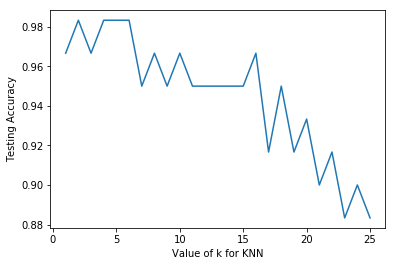

In [26]:
#using matplotlib
import matplotlib.pyplot as plt

#allows plot to appear within notebook
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy")


### Making prediction on out of sample data

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
#fit the model with x and y not x_train and y_train
knn.fit(x, y)
knn.predict([[3,5,4,2]])


array([1])